In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install openpyxl

     |████████████████████████████████| 244 kB 813 kB/s eta 0:00:01


In [2]:
train_cov=pd.read_excel("../input/covid19-radiography-database/COVID-19_Radiography_Dataset/COVID.metadata.xlsx")
train_cov["label"]= "COVID"
train_nor=pd.read_excel("../input/covid19-radiography-database/COVID-19_Radiography_Dataset/Normal.metadata.xlsx").sample(4192)
train_nor["label"]= "NORMAL"
train_pneu=pd.read_excel("../input/covid19-radiography-database/COVID-19_Radiography_Dataset/Viral Pneumonia.metadata.xlsx")
train_pneu["label"]= "PNEUMONIA"

In [3]:
import os
import pandas as pd
y = 0
data = []
for dirname, _, filenames in os.walk('../input/chest-xray-covid19-pneumonia/Data/train/PNEUMONIA'):
    for filename in filenames:
        y = y + 1
        if y<=2847:
            data.append(os.path.join(dirname, filename))


In [4]:
df_pneu2 = pd.DataFrame(data)

In [5]:
df_pneu2.rename(columns = {0:'images'}, inplace = True)
df_pneu2["target"] = "PNEUMONIA"

In [6]:
df_pneu2

,images,target
0,../input/chest-xray-covid19-pneumonia/Data/tra...,PNEUMONIA
1,../input/chest-xray-covid19-pneumonia/Data/tra...,PNEUMONIA
2,../input/chest-xray-covid19-pneumonia/Data/tra...,PNEUMONIA
3,../input/chest-xray-covid19-pneumonia/Data/tra...,PNEUMONIA
4,../input/chest-xray-covid19-pneumonia/Data/tra...,PNEUMONIA
...,...,...
2842,../input/chest-xray-covid19-pneumonia/Data/tra...,PNEUMONIA
2843,../input/chest-xray-covid19-pneumonia/Data/tra...,PNEUMONIA
2844,../input/chest-xray-covid19-pneumonia/Data/tra...,PNEUMONIA
2845,../input/chest-xray-covid19-pneumonia/Data/tra...,PNEUMONIA


In [7]:
import os
import pandas as pd
data1 = []
x = 0
for dirname, _, filenames in os.walk('../input/chest-xray-covid19-pneumonia/Data/train/COVID19'):
    for filename in filenames:
            data1.append(os.path.join(dirname, filename))
for dirname, _, filenames in os.walk('../input/chest-xray-covid19-pneumonia/Data/test/COVID19'):
    for filename in filenames:
            data1.append(os.path.join(dirname, filename))

In [8]:
df_cov2 = pd.DataFrame(data1)
df_cov2.rename(columns = {0:'images'}, inplace = True)
df_cov2["target"] = "COVID"

In [9]:
df_cov2.shape

(576, 2)

In [10]:
train_dir='../input/covid19-radiography-database/COVID-19_Radiography_Dataset/COVID/'
data=[]
labels=[]
for i in range(train_cov.shape[0]):
    data.append(train_dir+train_cov['FILE NAME'].iloc[i]+'.png')
    labels.append(train_cov['label'].iloc[i])
df_cov=pd.DataFrame(data)
df_cov.columns=['images']
df_cov['target']=labels

In [11]:
x= []
for i in range(train_nor.shape[0]):
    x.append(train_nor["FILE NAME"].iloc[i].title())

In [12]:
train_dir='../input/covid19-radiography-database/COVID-19_Radiography_Dataset/Normal/'
data=[]
labels=[]
for i in range(train_nor.shape[0]):
    data.append(train_dir+x[i]+'.png')
    labels.append(train_nor['label'].iloc[i])
df_nor=pd.DataFrame(data)
df_nor.columns=['images']
df_nor['target']=labels

In [13]:
df_nor

,images,target
0,../input/covid19-radiography-database/COVID-19...,NORMAL
1,../input/covid19-radiography-database/COVID-19...,NORMAL
2,../input/covid19-radiography-database/COVID-19...,NORMAL
3,../input/covid19-radiography-database/COVID-19...,NORMAL
4,../input/covid19-radiography-database/COVID-19...,NORMAL
...,...,...
4187,../input/covid19-radiography-database/COVID-19...,NORMAL
4188,../input/covid19-radiography-database/COVID-19...,NORMAL
4189,../input/covid19-radiography-database/COVID-19...,NORMAL
4190,../input/covid19-radiography-database/COVID-19...,NORMAL


In [14]:
train_dir='../input/covid19-radiography-database/COVID-19_Radiography_Dataset/Viral Pneumonia/'
data=[]
labels=[]
for i in range(train_pneu.shape[0]):
    data.append(train_dir+train_pneu['FILE NAME'].iloc[i]+'.png')
    labels.append(train_pneu['label'].iloc[i])
df_pneu=pd.DataFrame(data)
df_pneu.columns=['images']
df_pneu['target']=labels

In [15]:
train=pd.concat([df_pneu,df_nor,df_cov,df_pneu2,df_cov2])
train=train.reset_index()

In [16]:
train["target"].value_counts()

PNEUMONIA    4192
NORMAL       4192
COVID        4192
Name: target, dtype: int64

In [17]:
train= train.drop(["index"], axis=1)

In [18]:
train

,images,target
0,../input/covid19-radiography-database/COVID-19...,PNEUMONIA
1,../input/covid19-radiography-database/COVID-19...,PNEUMONIA
2,../input/covid19-radiography-database/COVID-19...,PNEUMONIA
3,../input/covid19-radiography-database/COVID-19...,PNEUMONIA
4,../input/covid19-radiography-database/COVID-19...,PNEUMONIA
...,...,...
12571,../input/chest-xray-covid19-pneumonia/Data/tes...,COVID
12572,../input/chest-xray-covid19-pneumonia/Data/tes...,COVID
12573,../input/chest-xray-covid19-pneumonia/Data/tes...,COVID
12574,../input/chest-xray-covid19-pneumonia/Data/tes...,COVID


In [19]:
train.shape

(12576, 2)

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(train['images'],train['target'],test_size=0.2,random_state=42)

train_gen = pd.DataFrame({'image_dir': x_train, 'target': y_train})
val_gen = pd.DataFrame({'image_dir': x_val, 'target': y_val})

In [21]:
train_gen

,image_dir,target
10772,../input/chest-xray-covid19-pneumonia/Data/tra...,PNEUMONIA
11833,../input/chest-xray-covid19-pneumonia/Data/tra...,PNEUMONIA
10513,../input/chest-xray-covid19-pneumonia/Data/tra...,PNEUMONIA
7808,../input/covid19-radiography-database/COVID-19...,COVID
7523,../input/covid19-radiography-database/COVID-19...,COVID
...,...,...
11964,../input/chest-xray-covid19-pneumonia/Data/tra...,PNEUMONIA
5191,../input/covid19-radiography-database/COVID-19...,NORMAL
5390,../input/covid19-radiography-database/COVID-19...,NORMAL
860,../input/covid19-radiography-database/COVID-19...,PNEUMONIA


In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,horizontal_flip=True)
val_datagen=ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_dataframe(
    train_gen,
    x_col='image_dir',
    y_col='target',
    target_size=(256, 256),
    batch_size=32,
    shuffle=True,
    class_mode='sparse',
validate_filenames=True)

validation_generator = val_datagen.flow_from_dataframe(
    val_gen,
    x_col='image_dir',
    y_col='target',
    target_size=(256, 256),
    shuffle=False,
    batch_size=32,
    class_mode='sparse',
validate_filenames=True)

Found 10060 validated image filenames belonging to 3 classes.
Found 2516 validated image filenames belonging to 3 classes.


In [29]:
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from tensorflow.keras.metrics import AUC
from tensorflow.keras.activations import sigmoid
from tensorflow.keras.optimizers import SGD, Adam, Adamax
from tensorflow.keras import Model
import tensorflow as tf

In [30]:
model = tf.keras.models.Sequential([
      layers.BatchNormalization(),
      layers.Conv2D(64, 3, activation='relu'),
      layers.MaxPooling2D(),
      layers.Dropout(0.3),
      layers.Conv2D(128,3,activation='relu'),
      layers.MaxPooling2D(),
      layers.Conv2D(256, 3, activation='relu'),
      layers.MaxPooling2D(),
      layers.Dropout(0.3),
      layers.Conv2D(512, 3, activation='relu'),
      layers.MaxPooling2D(),
      layers.Dropout(0.2),
      layers.Flatten(),
      layers.Dense(1024, activation='relu'),
      layers.Dropout(0.15),
      layers.Dense(3, activation= 'softmax')
    ])

In [31]:
import tensorflow.keras
#from focal_loss import BinaryFocalLoss
from tensorflow.keras.metrics import AUC
opt = tensorflow.keras.optimizers.Adam(learning_rate = 1e-3)
model.compile(optimizer=opt,loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# # model.compile(loss=keras.losses.BinaryCrossentropy(), metrics=['accuracy'],optimizer=opt)
# model.compile(loss=BinaryFocalLoss(gamma=2), metrics=['AUC'],optimizer=opt)

In [32]:
nb_epochs = 50
batch_size=32

In [33]:
hist=model.fit(
    train_generator,
    epochs=nb_epochs,
    validation_data=validation_generator)

# history = model.fit(train_generator,validation_data = validation_generator,epochs = 100,callbacks=callbacks)

Epoch 1/50
315/315 [==============================] - 233s 733ms/step - loss: 4.3910 - accuracy: 0.5747 - val_loss: 0.8314 - val_accuracy: 0.6395
Epoch 2/50
315/315 [==============================] - 225s 714ms/step - loss: 0.6060 - accuracy: 0.7045 - val_loss: 0.7869 - val_accuracy: 0.6002
Epoch 3/50
315/315 [==============================] - 225s 716ms/step - loss: 0.5222 - accuracy: 0.7522 - val_loss: 0.5276 - val_accuracy: 0.7643
Epoch 4/50
315/315 [==============================] - 225s 714ms/step - loss: 0.4537 - accuracy: 0.8002 - val_loss: 0.5117 - val_accuracy: 0.7683
Epoch 5/50
315/315 [==============================] - 225s 714ms/step - loss: 0.4848 - accuracy: 0.7787 - val_loss: 0.3731 - val_accuracy: 0.8430
Epoch 6/50
315/315 [==============================] - 226s 717ms/step - loss: 0.3753 - accuracy: 0.8386 - val_loss: 0.3816 - val_accuracy: 0.8498
Epoch 7/50
315/315 [==============================] - 226s 718ms/step - loss: 0.3643 - accuracy: 0.8478 - val_loss: 0.2893 -

In [39]:
def plot_accuracy_loss_chart(history):
    epochs = [i for i in range(50)]
    fig , ax = plt.subplots(1,2)
    train_acc = hist.history['accuracy']
    train_loss = hist.history['loss']
    val_acc = hist.history['val_accuracy']
    val_loss = hist.history['val_loss']
    fig.set_size_inches(20,10)
    ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
    ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
    ax[0].set_title('Training & Validation Accuracy')
    ax[0].legend()
    ax[0].set_xlabel("Epochs")
    ax[0].set_ylabel("Accuracy")

    ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
    ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
    ax[1].set_title('Training & Validation Loss')
    ax[1].legend()
    ax[1].set_xlabel("Epochs")
    ax[1].set_ylabel("Training & Validation Loss")
    plt.show()

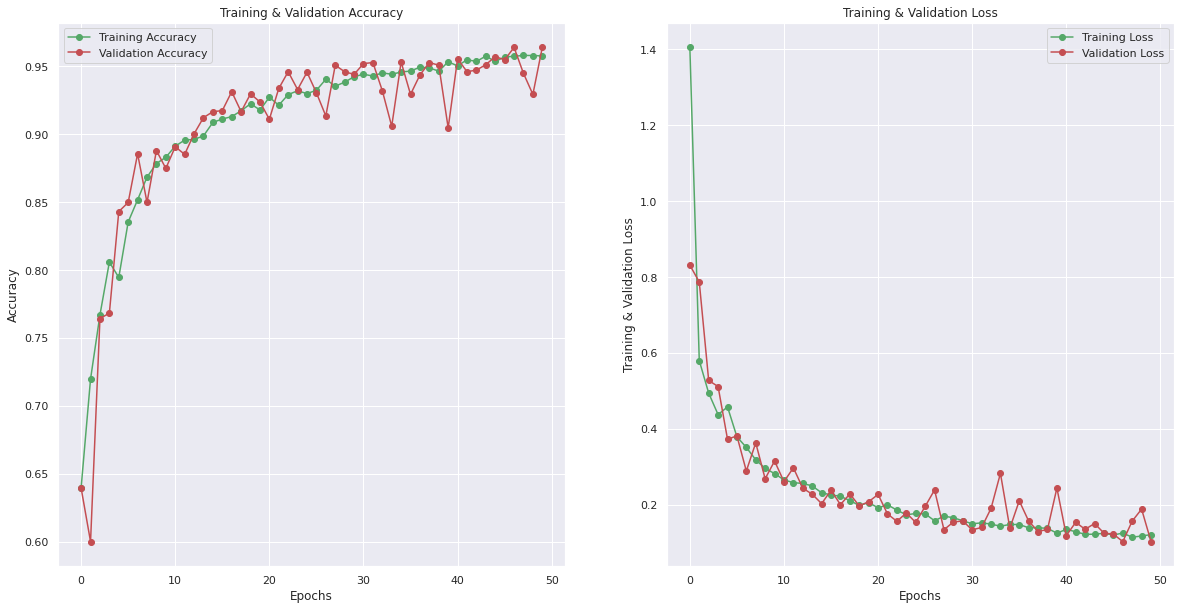

In [40]:
plot_accuracy_loss_chart(hist)

In [ ]:
s = model.predict(validation_generator)

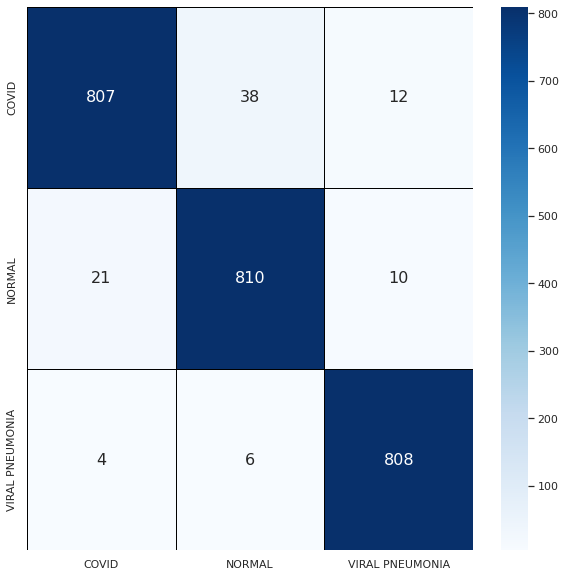

In [46]:
from sklearn.metrics import confusion_matrix
plt.rcParams.update({'font.size': 16})
predictions = model.predict(validation_generator)
predictions = np.argmax(predictions,axis=1)
predictions[:15]
cm = confusion_matrix(validation_generator.classes, predictions)
cm = pd.DataFrame(cm, index = ['0', '1', '2'], columns = ['0', '1', '2'])
cm
class_names = ['COVID','NORMAL','VIRAL PNEUMONIA']
def plot_confusion_matrix (cm):
    plt.figure(figsize = (10,10))
    sns.heatmap(
        cm, 
        cmap = 'Blues', 
        linecolor = 'black', 
        linewidth = 1, 
        annot = True, 
        fmt = '', 
        xticklabels = class_names, 
        yticklabels = class_names)
    
plot_confusion_matrix(cm)

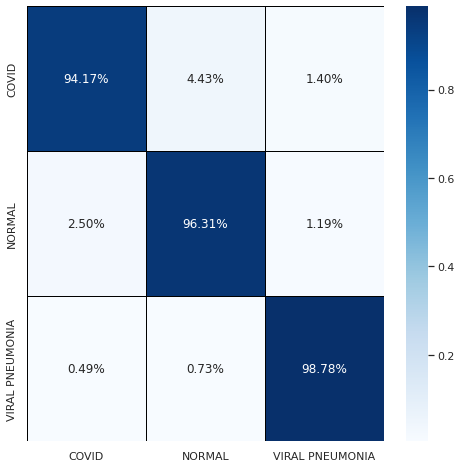

In [51]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(validation_generator.classes, predictions, normalize='true')
def plot_confusion_matrix (cm):
    plt.figure(figsize = (8,8))
    sns.heatmap(
        cm, 
        cmap = 'Blues', 
        linecolor = 'black', 
        linewidth = 1, 
        annot = True, 
        fmt=".2%", 
        xticklabels = class_names, 
        yticklabels = class_names)
    
plot_confusion_matrix(cm)

In [66]:
model.save_weights("model.hdf5")

In [67]:
from tensorflow.keras.models import load_model
model = load_model("model.hdf5")
train_loss, train_acc = model.evaluate(train_generator)
test_loss, test_acc   = model.evaluate(validation_generator)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))

ValueError: No model found in config file.